In [2]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [26]:
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac'][0:,1]
raw_Y=raw_Y.astype(np.float64)
raw_Y=np.expand_dims(raw_Y,-1)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [27]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 1) (1000, 1)


In [28]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(Dense(128,activation= 'sigmoid'))
model.add(Dense(256,activation= 'sigmoid'))
model.add(Dense(100,activation= 'sigmoid'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                4224      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 71,369
Trainable params: 71,369
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 

Epoch 1/3000
8/8 [==============================] - 0s 12ms/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 2/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 3/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 4/3000
8/8 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 8.4795e-04 - val_mean_squared_error: 8.4795e-04
Epoch 5/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 8.2151e-04 - val_mean_squared_error: 8.2151e-04
Epoch 7/3000
8/8 [=====

Epoch 48/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.6565e-06 - mean_squared_error: 8.6565e-06 - val_loss: 8.1914e-06 - val_mean_squared_error: 8.1914e-06
Epoch 49/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2076e-06 - mean_squared_error: 8.2076e-06 - val_loss: 7.8136e-06 - val_mean_squared_error: 7.8136e-06
Epoch 50/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2411e-06 - mean_squared_error: 8.2411e-06 - val_loss: 7.3614e-06 - val_mean_squared_error: 7.3614e-06
Epoch 51/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6111e-06 - mean_squared_error: 7.6111e-06 - val_loss: 7.6363e-06 - val_mean_squared_error: 7.6363e-06
Epoch 52/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5427e-06 - mean_squared_error: 7.5427e-06 - val_loss: 7.7333e-06 - val_mean_squared_error: 7.7333e-06
Epoch 53/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.1994e-06 - mean_squared_error: 7.1994e-0

8/8 [==============================] - 0s 3ms/step - loss: 3.0456e-06 - mean_squared_error: 3.0456e-06 - val_loss: 2.6263e-06 - val_mean_squared_error: 2.6263e-06
Epoch 141/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.9369e-06 - mean_squared_error: 2.9369e-06 - val_loss: 2.8285e-06 - val_mean_squared_error: 2.8285e-06
Epoch 142/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.9571e-06 - mean_squared_error: 2.9571e-06 - val_loss: 2.5819e-06 - val_mean_squared_error: 2.5819e-06
Epoch 143/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.8515e-06 - mean_squared_error: 2.8515e-06 - val_loss: 2.5421e-06 - val_mean_squared_error: 2.5421e-06
Epoch 144/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.7095e-06 - mean_squared_error: 2.7095e-06 - val_loss: 3.1058e-06 - val_mean_squared_error: 3.1058e-06
Epoch 145/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0632e-06 - mean_squared_error: 3.0632e-06 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 3.2356e-05 - mean_squared_error: 3.2356e-05 - val_loss: 3.9232e-05 - val_mean_squared_error: 3.9232e-05
Epoch 233/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3244e-05 - mean_squared_error: 1.3244e-05 - val_loss: 4.8028e-06 - val_mean_squared_error: 4.8028e-06
Epoch 234/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.5754e-06 - mean_squared_error: 3.5754e-06 - val_loss: 5.5229e-06 - val_mean_squared_error: 5.5229e-06
Epoch 235/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.8335e-06 - mean_squared_error: 2.8335e-06 - val_loss: 2.3987e-06 - val_mean_squared_error: 2.3987e-06
Epoch 236/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8324e-06 - mean_squared_error: 1.8324e-06 - val_loss: 1.4288e-06 - val_mean_squared_error: 1.4288e-06
Epoch 237/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.4474e-06 - mean_squared_error: 1.4474e-06 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 4.0447e-06 - mean_squared_error: 4.0447e-06 - val_loss: 2.6699e-06 - val_mean_squared_error: 2.6699e-06
Epoch 325/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9623e-06 - mean_squared_error: 1.9623e-06 - val_loss: 1.6270e-06 - val_mean_squared_error: 1.6270e-06
Epoch 326/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1484e-06 - mean_squared_error: 2.1484e-06 - val_loss: 1.3349e-06 - val_mean_squared_error: 1.3349e-06
Epoch 327/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6689e-06 - mean_squared_error: 1.6689e-06 - val_loss: 2.7229e-06 - val_mean_squared_error: 2.7229e-06
Epoch 328/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5383e-06 - mean_squared_error: 1.5383e-06 - val_loss: 1.3307e-06 - val_mean_squared_error: 1.3307e-06
Epoch 329/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0679e-06 - mean_squared_error: 3.0679e-06 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 6.1746e-06 - mean_squared_error: 6.1746e-06 - val_loss: 3.6741e-06 - val_mean_squared_error: 3.6741e-06
Epoch 417/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7536e-06 - mean_squared_error: 1.7536e-06 - val_loss: 1.2097e-06 - val_mean_squared_error: 1.2097e-06
Epoch 418/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7819e-06 - mean_squared_error: 1.7819e-06 - val_loss: 8.4295e-06 - val_mean_squared_error: 8.4295e-06
Epoch 419/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5650e-05 - mean_squared_error: 1.5650e-05 - val_loss: 1.9155e-05 - val_mean_squared_error: 1.9155e-05
Epoch 420/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3576e-05 - mean_squared_error: 6.3576e-05 - val_loss: 1.9611e-04 - val_mean_squared_error: 1.9611e-04
Epoch 421/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.8680e-04 - mean_squared_error: 5.8680e-04 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 1.7270e-05 - mean_squared_error: 1.7270e-05 - val_loss: 1.1505e-06 - val_mean_squared_error: 1.1505e-06
Epoch 509/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0471e-06 - mean_squared_error: 7.0471e-06 - val_loss: 1.6856e-05 - val_mean_squared_error: 1.6856e-05
Epoch 510/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.0073e-05 - mean_squared_error: 9.0073e-05 - val_loss: 2.4442e-04 - val_mean_squared_error: 2.4442e-04
Epoch 511/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3993e-04 - mean_squared_error: 2.3993e-04 - val_loss: 6.4249e-05 - val_mean_squared_error: 6.4249e-05
Epoch 512/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4082e-05 - mean_squared_error: 2.4082e-05 - val_loss: 4.5957e-05 - val_mean_squared_error: 4.5957e-05
Epoch 513/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.9397e-05 - mean_squared_error: 3.9397e-05 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 7.5640e-06 - mean_squared_error: 7.5640e-06 - val_loss: 1.2494e-05 - val_mean_squared_error: 1.2494e-05
Epoch 601/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.6473e-06 - mean_squared_error: 8.6473e-06 - val_loss: 1.4463e-06 - val_mean_squared_error: 1.4463e-06
Epoch 602/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.4923e-06 - mean_squared_error: 1.4923e-06 - val_loss: 3.6033e-06 - val_mean_squared_error: 3.6033e-06
Epoch 603/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0292e-05 - mean_squared_error: 1.0292e-05 - val_loss: 9.4348e-06 - val_mean_squared_error: 9.4348e-06
Epoch 604/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.9592e-06 - mean_squared_error: 3.9592e-06 - val_loss: 7.9252e-06 - val_mean_squared_error: 7.9252e-06
Epoch 605/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8940e-05 - mean_squared_error: 1.8940e-05 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 1.3169e-05 - mean_squared_error: 1.3169e-05 - val_loss: 1.4381e-05 - val_mean_squared_error: 1.4381e-05
Epoch 693/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7315e-06 - mean_squared_error: 4.7315e-06 - val_loss: 3.0094e-06 - val_mean_squared_error: 3.0094e-06
Epoch 694/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.2501e-06 - mean_squared_error: 2.2501e-06 - val_loss: 6.5709e-06 - val_mean_squared_error: 6.5709e-06
Epoch 695/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.1963e-05 - mean_squared_error: 3.1963e-05 - val_loss: 6.3459e-05 - val_mean_squared_error: 6.3459e-05
Epoch 696/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.5834e-05 - mean_squared_error: 4.5834e-05 - val_loss: 1.5398e-05 - val_mean_squared_error: 1.5398e-05
Epoch 697/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.4737e-06 - mean_squared_error: 4.4737e-06 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 1.9978e-06 - mean_squared_error: 1.9978e-06 - val_loss: 1.2314e-06 - val_mean_squared_error: 1.2314e-06
Epoch 785/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1509e-06 - mean_squared_error: 1.1509e-06 - val_loss: 1.3045e-06 - val_mean_squared_error: 1.3045e-06
Epoch 786/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1481e-06 - mean_squared_error: 1.1481e-06 - val_loss: 2.4247e-06 - val_mean_squared_error: 2.4247e-06
Epoch 787/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3203e-06 - mean_squared_error: 7.3203e-06 - val_loss: 1.5910e-05 - val_mean_squared_error: 1.5910e-05
Epoch 788/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.1931e-05 - mean_squared_error: 3.1931e-05 - val_loss: 7.0727e-05 - val_mean_squared_error: 7.0727e-05
Epoch 789/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2750e-04 - mean_squared_error: 1.2750e-04 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 2.1206e-06 - mean_squared_error: 2.1206e-06 - val_loss: 1.8004e-06 - val_mean_squared_error: 1.8004e-06
Epoch 877/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7234e-06 - mean_squared_error: 1.7234e-06 - val_loss: 4.7147e-06 - val_mean_squared_error: 4.7147e-06
Epoch 878/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.5008e-06 - mean_squared_error: 2.5008e-06 - val_loss: 1.0507e-06 - val_mean_squared_error: 1.0507e-06
Epoch 879/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0087e-06 - mean_squared_error: 3.0087e-06 - val_loss: 1.9337e-06 - val_mean_squared_error: 1.9337e-06
Epoch 880/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4479e-06 - mean_squared_error: 2.4479e-06 - val_loss: 4.0874e-06 - val_mean_squared_error: 4.0874e-06
Epoch 881/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.5005e-06 - mean_squared_error: 3.5005e-06 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 2.4619e-05 - mean_squared_error: 2.4619e-05 - val_loss: 1.8664e-05 - val_mean_squared_error: 1.8664e-05
Epoch 969/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2603e-05 - mean_squared_error: 1.2603e-05 - val_loss: 1.5130e-06 - val_mean_squared_error: 1.5130e-06
Epoch 970/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.5507e-06 - mean_squared_error: 6.5507e-06 - val_loss: 1.8923e-05 - val_mean_squared_error: 1.8923e-05
Epoch 971/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.9815e-05 - mean_squared_error: 2.9815e-05 - val_loss: 3.7365e-05 - val_mean_squared_error: 3.7365e-05
Epoch 972/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7201e-05 - mean_squared_error: 1.7201e-05 - val_loss: 1.7007e-06 - val_mean_squared_error: 1.7007e-06
Epoch 973/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7942e-06 - mean_squared_error: 1.7942e-06 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 1.9198e-06 - mean_squared_error: 1.9198e-06 - val_loss: 9.2577e-07 - val_mean_squared_error: 9.2577e-07
Epoch 1015/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0355e-06 - mean_squared_error: 3.0355e-06 - val_loss: 1.6531e-06 - val_mean_squared_error: 1.6531e-06
Epoch 1016/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0615e-06 - mean_squared_error: 1.0615e-06 - val_loss: 9.2597e-07 - val_mean_squared_error: 9.2597e-07
Epoch 1017/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1885e-06 - mean_squared_error: 2.1885e-06 - val_loss: 1.0016e-06 - val_mean_squared_error: 1.0016e-06
Epoch 1018/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2163e-05 - mean_squared_error: 1.2163e-05 - val_loss: 3.4487e-05 - val_mean_squared_error: 3.4487e-05
Epoch 1019/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.7401e-05 - mean_squared_error: 2.7401e-05 - 

Epoch 1060/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7669e-05 - mean_squared_error: 2.7669e-05 - val_loss: 4.9488e-06 - val_mean_squared_error: 4.9488e-06
Epoch 1061/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.9112e-06 - mean_squared_error: 9.9112e-06 - val_loss: 1.6889e-05 - val_mean_squared_error: 1.6889e-05
Epoch 1062/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0387e-05 - mean_squared_error: 1.0387e-05 - val_loss: 5.6775e-06 - val_mean_squared_error: 5.6775e-06
Epoch 1063/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.5991e-06 - mean_squared_error: 3.5991e-06 - val_loss: 8.8366e-07 - val_mean_squared_error: 8.8366e-07
Epoch 1064/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6069e-06 - mean_squared_error: 1.6069e-06 - val_loss: 9.7332e-07 - val_mean_squared_error: 9.7332e-07
Epoch 1065/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9884e-06 - mean_squared_erro

Epoch 1106/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8090e-06 - mean_squared_error: 1.8090e-06 - val_loss: 3.8381e-06 - val_mean_squared_error: 3.8381e-06
Epoch 1107/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.9454e-06 - mean_squared_error: 6.9454e-06 - val_loss: 2.0139e-05 - val_mean_squared_error: 2.0139e-05
Epoch 1108/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.4424e-05 - mean_squared_error: 4.4424e-05 - val_loss: 9.0522e-05 - val_mean_squared_error: 9.0522e-05
Epoch 1109/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.0483e-05 - mean_squared_error: 6.0483e-05 - val_loss: 9.2939e-07 - val_mean_squared_error: 9.2939e-07
Epoch 1110/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3640e-05 - mean_squared_error: 2.3640e-05 - val_loss: 4.8447e-05 - val_mean_squared_error: 4.8447e-05
Epoch 1111/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8090e-05 - mean_squared_erro

Epoch 1152/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.9506e-05 - mean_squared_error: 5.9506e-05 - val_loss: 4.4107e-05 - val_mean_squared_error: 4.4107e-05
Epoch 1153/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.2542e-05 - mean_squared_error: 2.2542e-05 - val_loss: 1.3766e-05 - val_mean_squared_error: 1.3766e-05
Epoch 1154/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1532e-06 - mean_squared_error: 9.1532e-06 - val_loss: 3.9191e-06 - val_mean_squared_error: 3.9191e-06
Epoch 1155/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.4393e-06 - mean_squared_error: 7.4393e-06 - val_loss: 4.0923e-06 - val_mean_squared_error: 4.0923e-06
Epoch 1156/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.7326e-06 - mean_squared_error: 8.7326e-06 - val_loss: 1.9407e-05 - val_mean_squared_error: 1.9407e-05
Epoch 1157/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1329e-05 - mean_squared_erro

Epoch 1198/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.8690e-05 - mean_squared_error: 6.8690e-05 - val_loss: 7.0964e-05 - val_mean_squared_error: 7.0964e-05
Epoch 1199/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.2151e-05 - mean_squared_error: 3.2151e-05 - val_loss: 1.0027e-05 - val_mean_squared_error: 1.0027e-05
Epoch 1200/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1997e-05 - mean_squared_error: 2.1997e-05 - val_loss: 4.9352e-06 - val_mean_squared_error: 4.9352e-06
Epoch 1201/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5872e-06 - mean_squared_error: 7.5872e-06 - val_loss: 8.5330e-06 - val_mean_squared_error: 8.5330e-06
Epoch 1202/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.8998e-06 - mean_squared_error: 5.8998e-06 - val_loss: 1.6346e-05 - val_mean_squared_error: 1.6346e-05
Epoch 1203/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5295e-05 - mean_squared_erro

Epoch 1244/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.5669e-06 - mean_squared_error: 2.5669e-06 - val_loss: 1.3985e-06 - val_mean_squared_error: 1.3985e-06
Epoch 1245/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.5344e-06 - mean_squared_error: 3.5344e-06 - val_loss: 1.0608e-05 - val_mean_squared_error: 1.0608e-05
Epoch 1246/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1765e-05 - mean_squared_error: 2.1765e-05 - val_loss: 2.7679e-05 - val_mean_squared_error: 2.7679e-05
Epoch 1247/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5820e-05 - mean_squared_error: 1.5820e-05 - val_loss: 1.0302e-06 - val_mean_squared_error: 1.0302e-06
Epoch 1248/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7541e-06 - mean_squared_error: 6.7541e-06 - val_loss: 3.4275e-05 - val_mean_squared_error: 3.4275e-05
Epoch 1249/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3877e-05 - mean_squared_erro

Epoch 1290/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.0591e-06 - mean_squared_error: 2.0591e-06 - val_loss: 3.4487e-06 - val_mean_squared_error: 3.4487e-06
Epoch 1291/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9259e-06 - mean_squared_error: 1.9259e-06 - val_loss: 5.1787e-06 - val_mean_squared_error: 5.1787e-06
Epoch 1292/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.3736e-06 - mean_squared_error: 4.3736e-06 - val_loss: 2.2805e-06 - val_mean_squared_error: 2.2805e-06
Epoch 1293/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.4655e-06 - mean_squared_error: 3.4655e-06 - val_loss: 1.6737e-06 - val_mean_squared_error: 1.6737e-06
Epoch 1294/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4200e-06 - mean_squared_error: 2.4200e-06 - val_loss: 9.2909e-07 - val_mean_squared_error: 9.2909e-07
Epoch 1295/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7112e-06 - mean_squared_erro

Epoch 1336/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6839e-05 - mean_squared_error: 7.6839e-05 - val_loss: 9.0323e-07 - val_mean_squared_error: 9.0323e-07
Epoch 1337/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9700e-05 - mean_squared_error: 1.9700e-05 - val_loss: 6.9171e-06 - val_mean_squared_error: 6.9171e-06
Epoch 1338/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.5037e-06 - mean_squared_error: 9.5037e-06 - val_loss: 6.9172e-06 - val_mean_squared_error: 6.9172e-06
Epoch 1339/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.5180e-06 - mean_squared_error: 5.5180e-06 - val_loss: 1.1622e-05 - val_mean_squared_error: 1.1622e-05
Epoch 1340/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.5073e-06 - mean_squared_error: 5.5073e-06 - val_loss: 9.2145e-07 - val_mean_squared_error: 9.2145e-07
Epoch 1341/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.4812e-06 - mean_squared_erro

Epoch 1382/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6246e-07 - mean_squared_error: 7.6246e-07 - val_loss: 1.2266e-06 - val_mean_squared_error: 1.2266e-06
Epoch 1383/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5034e-06 - mean_squared_error: 1.5034e-06 - val_loss: 1.1691e-06 - val_mean_squared_error: 1.1691e-06
Epoch 1384/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.0688e-07 - mean_squared_error: 9.0688e-07 - val_loss: 7.1929e-07 - val_mean_squared_error: 7.1929e-07
Epoch 1385/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.4555e-07 - mean_squared_error: 8.4555e-07 - val_loss: 1.2762e-06 - val_mean_squared_error: 1.2762e-06
Epoch 1386/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0289e-06 - mean_squared_error: 1.0289e-06 - val_loss: 7.4802e-07 - val_mean_squared_error: 7.4802e-07
Epoch 1387/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.3429e-06 - mean_squared_erro

Epoch 1428/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3332e-06 - mean_squared_error: 1.3332e-06 - val_loss: 3.2859e-06 - val_mean_squared_error: 3.2859e-06
Epoch 1429/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.5073e-06 - mean_squared_error: 2.5073e-06 - val_loss: 6.6772e-06 - val_mean_squared_error: 6.6772e-06
Epoch 1430/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.0988e-06 - mean_squared_error: 8.0988e-06 - val_loss: 1.1450e-06 - val_mean_squared_error: 1.1450e-06
Epoch 1431/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.8332e-06 - mean_squared_error: 3.8332e-06 - val_loss: 7.3932e-06 - val_mean_squared_error: 7.3932e-06
Epoch 1432/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.2837e-06 - mean_squared_error: 4.2837e-06 - val_loss: 2.7412e-06 - val_mean_squared_error: 2.7412e-06
Epoch 1433/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1005e-05 - mean_squared_erro

Epoch 1474/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0013e-05 - mean_squared_error: 1.0013e-05 - val_loss: 9.2417e-07 - val_mean_squared_error: 9.2417e-07
Epoch 1475/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.8302e-06 - mean_squared_error: 3.8302e-06 - val_loss: 7.5833e-07 - val_mean_squared_error: 7.5833e-07
Epoch 1476/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0728e-06 - mean_squared_error: 1.0728e-06 - val_loss: 2.2619e-06 - val_mean_squared_error: 2.2619e-06
Epoch 1477/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6490e-06 - mean_squared_error: 1.6490e-06 - val_loss: 1.2759e-06 - val_mean_squared_error: 1.2759e-06
Epoch 1478/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9218e-06 - mean_squared_error: 1.9218e-06 - val_loss: 7.1266e-07 - val_mean_squared_error: 7.1266e-07
Epoch 1479/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.8833e-06 - mean_squared_erro

Epoch 1520/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.2622e-06 - mean_squared_error: 7.2622e-06 - val_loss: 6.7607e-07 - val_mean_squared_error: 6.7607e-07
Epoch 1521/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1050e-05 - mean_squared_error: 1.1050e-05 - val_loss: 1.8978e-05 - val_mean_squared_error: 1.8978e-05
Epoch 1522/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.4802e-06 - mean_squared_error: 7.4802e-06 - val_loss: 1.5366e-05 - val_mean_squared_error: 1.5366e-05
Epoch 1523/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.4800e-06 - mean_squared_error: 7.4800e-06 - val_loss: 2.3095e-06 - val_mean_squared_error: 2.3095e-06
Epoch 1524/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.2641e-06 - mean_squared_error: 2.2641e-06 - val_loss: 1.0859e-06 - val_mean_squared_error: 1.0859e-06
Epoch 1525/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0780e-06 - mean_squared_erro

Epoch 1566/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.1599e-06 - mean_squared_error: 3.1599e-06 - val_loss: 9.5176e-07 - val_mean_squared_error: 9.5176e-07
Epoch 1567/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2882e-06 - mean_squared_error: 1.2882e-06 - val_loss: 6.4599e-07 - val_mean_squared_error: 6.4599e-07
Epoch 1568/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7963e-07 - mean_squared_error: 6.7963e-07 - val_loss: 8.7532e-07 - val_mean_squared_error: 8.7532e-07
Epoch 1569/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5743e-06 - mean_squared_error: 7.5743e-06 - val_loss: 7.9394e-06 - val_mean_squared_error: 7.9394e-06
Epoch 1570/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.1055e-06 - mean_squared_error: 3.1055e-06 - val_loss: 4.7033e-06 - val_mean_squared_error: 4.7033e-06
Epoch 1571/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9707e-06 - mean_squared_erro

Epoch 1612/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0985e-05 - mean_squared_error: 3.0985e-05 - val_loss: 9.3817e-05 - val_mean_squared_error: 9.3817e-05
Epoch 1613/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7977e-05 - mean_squared_error: 6.7977e-05 - val_loss: 1.6524e-06 - val_mean_squared_error: 1.6524e-06
Epoch 1614/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0993e-05 - mean_squared_error: 1.0993e-05 - val_loss: 6.2867e-07 - val_mean_squared_error: 6.2867e-07
Epoch 1615/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.9502e-07 - mean_squared_error: 8.9502e-07 - val_loss: 9.3445e-07 - val_mean_squared_error: 9.3445e-07
Epoch 1616/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2371e-06 - mean_squared_error: 1.2371e-06 - val_loss: 1.9817e-06 - val_mean_squared_error: 1.9817e-06
Epoch 1617/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2075e-06 - mean_squared_erro

Epoch 1658/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6604e-06 - mean_squared_error: 1.6604e-06 - val_loss: 6.0036e-07 - val_mean_squared_error: 6.0036e-07
Epoch 1659/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.1191e-06 - mean_squared_error: 6.1191e-06 - val_loss: 7.2316e-06 - val_mean_squared_error: 7.2316e-06
Epoch 1660/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.5745e-06 - mean_squared_error: 2.5745e-06 - val_loss: 6.6341e-07 - val_mean_squared_error: 6.6341e-07
Epoch 1661/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.9176e-06 - mean_squared_error: 4.9176e-06 - val_loss: 1.1582e-05 - val_mean_squared_error: 1.1582e-05
Epoch 1662/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0436e-05 - mean_squared_error: 1.0436e-05 - val_loss: 1.1405e-05 - val_mean_squared_error: 1.1405e-05
Epoch 1663/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0011e-05 - mean_squared_erro

Epoch 1749/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7228e-07 - mean_squared_error: 7.7228e-07 - val_loss: 1.7212e-06 - val_mean_squared_error: 1.7212e-06
Epoch 1750/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.7561e-06 - mean_squared_error: 2.7561e-06 - val_loss: 1.2518e-06 - val_mean_squared_error: 1.2518e-06
Epoch 1751/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.4920e-06 - mean_squared_error: 3.4920e-06 - val_loss: 1.7010e-05 - val_mean_squared_error: 1.7010e-05
Epoch 1752/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8830e-06 - mean_squared_error: 7.8830e-06 - val_loss: 2.4641e-06 - val_mean_squared_error: 2.4641e-06
Epoch 1753/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.7117e-06 - mean_squared_error: 3.7117e-06 - val_loss: 2.6238e-06 - val_mean_squared_error: 2.6238e-06
Epoch 1754/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6615e-06 - mean_squared_erro

Epoch 1795/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7847e-06 - mean_squared_error: 1.7847e-06 - val_loss: 4.9405e-06 - val_mean_squared_error: 4.9405e-06
Epoch 1796/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.4997e-06 - mean_squared_error: 3.4997e-06 - val_loss: 2.9027e-06 - val_mean_squared_error: 2.9027e-06
Epoch 1797/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.9140e-06 - mean_squared_error: 4.9140e-06 - val_loss: 1.2277e-06 - val_mean_squared_error: 1.2277e-06
Epoch 1798/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.2997e-06 - mean_squared_error: 4.2997e-06 - val_loss: 1.3552e-05 - val_mean_squared_error: 1.3552e-05
Epoch 1799/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.5866e-06 - mean_squared_error: 6.5866e-06 - val_loss: 6.0177e-07 - val_mean_squared_error: 6.0177e-07
Epoch 1800/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0762e-06 - mean_squared_erro

Epoch 1841/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9177e-06 - mean_squared_error: 1.9177e-06 - val_loss: 5.6175e-07 - val_mean_squared_error: 5.6175e-07
Epoch 1842/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.2474e-06 - mean_squared_error: 4.2474e-06 - val_loss: 8.7883e-06 - val_mean_squared_error: 8.7883e-06
Epoch 1843/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0621e-05 - mean_squared_error: 1.0621e-05 - val_loss: 7.4771e-06 - val_mean_squared_error: 7.4771e-06
Epoch 1844/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.0500e-06 - mean_squared_error: 5.0500e-06 - val_loss: 7.1547e-07 - val_mean_squared_error: 7.1547e-07
Epoch 1845/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9817e-06 - mean_squared_error: 1.9817e-06 - val_loss: 5.6262e-07 - val_mean_squared_error: 5.6262e-07
Epoch 1846/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.4480e-05 - mean_squared_erro

Epoch 1887/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2188e-06 - mean_squared_error: 1.2188e-06 - val_loss: 1.6412e-06 - val_mean_squared_error: 1.6412e-06
Epoch 1888/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0106e-05 - mean_squared_error: 1.0106e-05 - val_loss: 1.9106e-05 - val_mean_squared_error: 1.9106e-05
Epoch 1889/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2911e-05 - mean_squared_error: 1.2911e-05 - val_loss: 3.8992e-06 - val_mean_squared_error: 3.8992e-06
Epoch 1890/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9180e-06 - mean_squared_error: 1.9180e-06 - val_loss: 3.9410e-06 - val_mean_squared_error: 3.9410e-06
Epoch 1891/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.5957e-06 - mean_squared_error: 3.5957e-06 - val_loss: 8.0559e-07 - val_mean_squared_error: 8.0559e-07
Epoch 1892/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.4840e-07 - mean_squared_erro

Epoch 1933/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1338e-06 - mean_squared_error: 2.1338e-06 - val_loss: 3.2027e-06 - val_mean_squared_error: 3.2027e-06
Epoch 1934/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1743e-06 - mean_squared_error: 2.1743e-06 - val_loss: 1.0364e-06 - val_mean_squared_error: 1.0364e-06
Epoch 1935/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0117e-06 - mean_squared_error: 1.0117e-06 - val_loss: 5.2863e-07 - val_mean_squared_error: 5.2863e-07
Epoch 1936/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7153e-07 - mean_squared_error: 6.7153e-07 - val_loss: 5.1291e-07 - val_mean_squared_error: 5.1291e-07
Epoch 1937/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6054e-07 - mean_squared_error: 7.6054e-07 - val_loss: 6.5959e-07 - val_mean_squared_error: 6.5959e-07
Epoch 1938/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.2143e-07 - mean_squared_erro

Epoch 1979/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1262e-05 - mean_squared_error: 1.1262e-05 - val_loss: 2.4379e-06 - val_mean_squared_error: 2.4379e-06
Epoch 1980/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.9531e-06 - mean_squared_error: 9.9531e-06 - val_loss: 6.5740e-06 - val_mean_squared_error: 6.5740e-06
Epoch 1981/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9374e-06 - mean_squared_error: 1.9374e-06 - val_loss: 3.1510e-06 - val_mean_squared_error: 3.1510e-06
Epoch 1982/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1635e-06 - mean_squared_error: 2.1635e-06 - val_loss: 6.4865e-07 - val_mean_squared_error: 6.4865e-07
Epoch 1983/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.3161e-06 - mean_squared_error: 3.3161e-06 - val_loss: 3.9889e-06 - val_mean_squared_error: 3.9889e-06
Epoch 1984/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.9439e-06 - mean_squared_erro

Epoch 2025/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3372e-05 - mean_squared_error: 1.3372e-05 - val_loss: 3.3049e-05 - val_mean_squared_error: 3.3049e-05
Epoch 2026/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.9487e-05 - mean_squared_error: 2.9487e-05 - val_loss: 1.6093e-06 - val_mean_squared_error: 1.6093e-06
Epoch 2027/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.6903e-06 - mean_squared_error: 3.6903e-06 - val_loss: 3.8531e-06 - val_mean_squared_error: 3.8531e-06
Epoch 2028/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7961e-06 - mean_squared_error: 1.7961e-06 - val_loss: 1.6649e-06 - val_mean_squared_error: 1.6649e-06
Epoch 2029/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0608e-06 - mean_squared_error: 1.0608e-06 - val_loss: 5.2080e-07 - val_mean_squared_error: 5.2080e-07
Epoch 2030/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3287e-07 - mean_squared_erro

Epoch 2071/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1238e-06 - mean_squared_error: 2.1238e-06 - val_loss: 5.6353e-06 - val_mean_squared_error: 5.6353e-06
Epoch 2072/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.9821e-06 - mean_squared_error: 3.9821e-06 - val_loss: 6.8683e-07 - val_mean_squared_error: 6.8683e-07
Epoch 2073/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.9140e-07 - mean_squared_error: 5.9140e-07 - val_loss: 5.0428e-07 - val_mean_squared_error: 5.0428e-07
Epoch 2074/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.9493e-07 - mean_squared_error: 5.9493e-07 - val_loss: 5.2573e-07 - val_mean_squared_error: 5.2573e-07
Epoch 2075/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0694e-06 - mean_squared_error: 1.0694e-06 - val_loss: 1.1197e-06 - val_mean_squared_error: 1.1197e-06
Epoch 2076/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9405e-06 - mean_squared_erro

Epoch 2117/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.8721e-06 - mean_squared_error: 5.8721e-06 - val_loss: 2.2472e-06 - val_mean_squared_error: 2.2472e-06
Epoch 2118/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.1662e-06 - mean_squared_error: 4.1662e-06 - val_loss: 1.7792e-05 - val_mean_squared_error: 1.7792e-05
Epoch 2119/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.0310e-05 - mean_squared_error: 2.0310e-05 - val_loss: 2.5062e-06 - val_mean_squared_error: 2.5062e-06
Epoch 2120/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6139e-06 - mean_squared_error: 7.6139e-06 - val_loss: 1.5824e-05 - val_mean_squared_error: 1.5824e-05
Epoch 2121/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.8425e-06 - mean_squared_error: 5.8425e-06 - val_loss: 8.7284e-06 - val_mean_squared_error: 8.7284e-06
Epoch 2122/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.1040e-06 - mean_squared_erro

Epoch 2163/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.8143e-06 - mean_squared_error: 9.8143e-06 - val_loss: 1.4748e-05 - val_mean_squared_error: 1.4748e-05
Epoch 2164/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.0726e-06 - mean_squared_error: 6.0726e-06 - val_loss: 3.1790e-06 - val_mean_squared_error: 3.1790e-06
Epoch 2165/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2550e-05 - mean_squared_error: 1.2550e-05 - val_loss: 1.6896e-05 - val_mean_squared_error: 1.6896e-05
Epoch 2166/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2335e-06 - mean_squared_error: 8.2335e-06 - val_loss: 4.6673e-07 - val_mean_squared_error: 4.6673e-07
Epoch 2167/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8086e-07 - mean_squared_error: 7.8086e-07 - val_loss: 1.7535e-06 - val_mean_squared_error: 1.7535e-06
Epoch 2168/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5234e-06 - mean_squared_erro

Epoch 2209/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7487e-06 - mean_squared_error: 1.7487e-06 - val_loss: 5.5648e-07 - val_mean_squared_error: 5.5648e-07
Epoch 2210/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.0533e-07 - mean_squared_error: 9.0533e-07 - val_loss: 2.1107e-06 - val_mean_squared_error: 2.1107e-06
Epoch 2211/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9218e-06 - mean_squared_error: 1.9218e-06 - val_loss: 1.7506e-06 - val_mean_squared_error: 1.7506e-06
Epoch 2212/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8923e-06 - mean_squared_error: 1.8923e-06 - val_loss: 3.7379e-06 - val_mean_squared_error: 3.7379e-06
Epoch 2213/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.2678e-06 - mean_squared_error: 4.2678e-06 - val_loss: 5.3367e-06 - val_mean_squared_error: 5.3367e-06
Epoch 2214/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.9482e-06 - mean_squared_erro

Epoch 2255/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.8014e-07 - mean_squared_error: 9.8014e-07 - val_loss: 1.5204e-06 - val_mean_squared_error: 1.5204e-06
Epoch 2256/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3981e-06 - mean_squared_error: 2.3981e-06 - val_loss: 3.1800e-06 - val_mean_squared_error: 3.1800e-06
Epoch 2257/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4702e-06 - mean_squared_error: 2.4702e-06 - val_loss: 6.5697e-07 - val_mean_squared_error: 6.5697e-07
Epoch 2258/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.9091e-07 - mean_squared_error: 4.9091e-07 - val_loss: 5.1318e-07 - val_mean_squared_error: 5.1318e-07
Epoch 2259/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6593e-06 - mean_squared_error: 1.6593e-06 - val_loss: 4.1729e-06 - val_mean_squared_error: 4.1729e-06
Epoch 2260/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0260e-06 - mean_squared_erro

Epoch 2301/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.0817e-06 - mean_squared_error: 8.0817e-06 - val_loss: 8.0918e-06 - val_mean_squared_error: 8.0918e-06
Epoch 2302/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.3890e-06 - mean_squared_error: 4.3890e-06 - val_loss: 7.2940e-07 - val_mean_squared_error: 7.2940e-07
Epoch 2303/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4823e-07 - mean_squared_error: 5.4823e-07 - val_loss: 5.2512e-07 - val_mean_squared_error: 5.2512e-07
Epoch 2304/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3029e-06 - mean_squared_error: 2.3029e-06 - val_loss: 3.8874e-06 - val_mean_squared_error: 3.8874e-06
Epoch 2305/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.8848e-06 - mean_squared_error: 5.8848e-06 - val_loss: 1.1152e-05 - val_mean_squared_error: 1.1152e-05
Epoch 2306/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1585e-05 - mean_squared_erro

Epoch 2347/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.5265e-06 - mean_squared_error: 5.5265e-06 - val_loss: 6.5666e-06 - val_mean_squared_error: 6.5666e-06
Epoch 2348/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4635e-06 - mean_squared_error: 2.4635e-06 - val_loss: 1.5303e-06 - val_mean_squared_error: 1.5303e-06
Epoch 2349/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.1467e-07 - mean_squared_error: 9.1467e-07 - val_loss: 1.8730e-06 - val_mean_squared_error: 1.8730e-06
Epoch 2350/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.6218e-06 - mean_squared_error: 2.6218e-06 - val_loss: 1.0465e-06 - val_mean_squared_error: 1.0465e-06
Epoch 2351/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7313e-06 - mean_squared_error: 1.7313e-06 - val_loss: 6.0437e-07 - val_mean_squared_error: 6.0437e-07
Epoch 2352/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.3181e-07 - mean_squared_erro

Epoch 2393/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2163e-05 - mean_squared_error: 1.2163e-05 - val_loss: 9.2712e-06 - val_mean_squared_error: 9.2712e-06
Epoch 2394/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.1696e-06 - mean_squared_error: 6.1696e-06 - val_loss: 1.7367e-06 - val_mean_squared_error: 1.7367e-06
Epoch 2395/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7229e-07 - mean_squared_error: 7.7229e-07 - val_loss: 1.2517e-06 - val_mean_squared_error: 1.2517e-06
Epoch 2396/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1911e-06 - mean_squared_error: 2.1911e-06 - val_loss: 3.4112e-06 - val_mean_squared_error: 3.4112e-06
Epoch 2397/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.5863e-06 - mean_squared_error: 2.5863e-06 - val_loss: 4.8384e-07 - val_mean_squared_error: 4.8384e-07
Epoch 2398/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7527e-07 - mean_squared_erro

Epoch 2439/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.1776e-06 - mean_squared_error: 3.1776e-06 - val_loss: 6.3938e-07 - val_mean_squared_error: 6.3938e-07
Epoch 2440/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1357e-06 - mean_squared_error: 1.1357e-06 - val_loss: 3.0761e-06 - val_mean_squared_error: 3.0761e-06
Epoch 2441/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1872e-05 - mean_squared_error: 1.1872e-05 - val_loss: 2.1279e-05 - val_mean_squared_error: 2.1279e-05
Epoch 2442/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0443e-05 - mean_squared_error: 1.0443e-05 - val_loss: 1.0726e-06 - val_mean_squared_error: 1.0726e-06
Epoch 2443/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9885e-06 - mean_squared_error: 1.9885e-06 - val_loss: 5.4142e-07 - val_mean_squared_error: 5.4142e-07
Epoch 2444/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.9586e-07 - mean_squared_erro

Epoch 2485/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.0283e-06 - mean_squared_error: 2.0283e-06 - val_loss: 4.2453e-06 - val_mean_squared_error: 4.2453e-06
Epoch 2486/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.7734e-06 - mean_squared_error: 3.7734e-06 - val_loss: 5.8683e-07 - val_mean_squared_error: 5.8683e-07
Epoch 2487/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.7156e-07 - mean_squared_error: 8.7156e-07 - val_loss: 1.6949e-06 - val_mean_squared_error: 1.6949e-06
Epoch 2488/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.4226e-06 - mean_squared_error: 1.4226e-06 - val_loss: 9.9678e-07 - val_mean_squared_error: 9.9678e-07
Epoch 2489/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2797e-06 - mean_squared_error: 1.2797e-06 - val_loss: 1.5699e-06 - val_mean_squared_error: 1.5699e-06
Epoch 2490/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5463e-06 - mean_squared_erro

Epoch 2531/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0082e-06 - mean_squared_error: 1.0082e-06 - val_loss: 5.6288e-07 - val_mean_squared_error: 5.6288e-07
Epoch 2532/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3022e-06 - mean_squared_error: 2.3022e-06 - val_loss: 6.0312e-06 - val_mean_squared_error: 6.0312e-06
Epoch 2533/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.9527e-05 - mean_squared_error: 1.9527e-05 - val_loss: 3.3709e-05 - val_mean_squared_error: 3.3709e-05
Epoch 2534/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7092e-05 - mean_squared_error: 1.7092e-05 - val_loss: 1.0615e-06 - val_mean_squared_error: 1.0615e-06
Epoch 2535/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.1524e-06 - mean_squared_error: 5.1524e-06 - val_loss: 1.1004e-06 - val_mean_squared_error: 1.1004e-06
Epoch 2536/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7648e-06 - mean_squared_erro

Epoch 2577/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1218e-06 - mean_squared_error: 2.1218e-06 - val_loss: 3.2962e-06 - val_mean_squared_error: 3.2962e-06
Epoch 2578/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0577e-06 - mean_squared_error: 3.0577e-06 - val_loss: 4.7396e-07 - val_mean_squared_error: 4.7396e-07
Epoch 2579/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.2475e-07 - mean_squared_error: 7.2475e-07 - val_loss: 8.9082e-07 - val_mean_squared_error: 8.9082e-07
Epoch 2580/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8046e-06 - mean_squared_error: 1.8046e-06 - val_loss: 1.6587e-06 - val_mean_squared_error: 1.6587e-06
Epoch 2581/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7367e-06 - mean_squared_error: 1.7367e-06 - val_loss: 8.0072e-06 - val_mean_squared_error: 8.0072e-06
Epoch 2582/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0081e-05 - mean_squared_erro

Epoch 2623/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3180e-06 - mean_squared_error: 2.3180e-06 - val_loss: 4.4290e-06 - val_mean_squared_error: 4.4290e-06
Epoch 2624/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.1144e-06 - mean_squared_error: 2.1144e-06 - val_loss: 1.1152e-06 - val_mean_squared_error: 1.1152e-06
Epoch 2625/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.2225e-06 - mean_squared_error: 3.2225e-06 - val_loss: 5.2262e-06 - val_mean_squared_error: 5.2262e-06
Epoch 2626/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3443e-06 - mean_squared_error: 6.3443e-06 - val_loss: 3.0699e-06 - val_mean_squared_error: 3.0699e-06
Epoch 2627/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.2667e-06 - mean_squared_error: 2.2667e-06 - val_loss: 3.0799e-06 - val_mean_squared_error: 3.0799e-06
Epoch 2628/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.0067e-06 - mean_squared_erro

Epoch 2669/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8870e-06 - mean_squared_error: 1.8870e-06 - val_loss: 4.3220e-07 - val_mean_squared_error: 4.3220e-07
Epoch 2670/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.5157e-07 - mean_squared_error: 8.5157e-07 - val_loss: 7.5233e-07 - val_mean_squared_error: 7.5233e-07
Epoch 2671/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.8600e-07 - mean_squared_error: 6.8600e-07 - val_loss: 3.5591e-07 - val_mean_squared_error: 3.5591e-07
Epoch 2672/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5763e-06 - mean_squared_error: 1.5763e-06 - val_loss: 1.5408e-06 - val_mean_squared_error: 1.5408e-06
Epoch 2673/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1538e-06 - mean_squared_error: 1.1538e-06 - val_loss: 3.6127e-06 - val_mean_squared_error: 3.6127e-06
Epoch 2674/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.8941e-06 - mean_squared_erro

Epoch 2715/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.1309e-06 - mean_squared_error: 5.1309e-06 - val_loss: 5.1002e-06 - val_mean_squared_error: 5.1002e-06
Epoch 2716/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.0382e-06 - mean_squared_error: 2.0382e-06 - val_loss: 4.0243e-07 - val_mean_squared_error: 4.0243e-07
Epoch 2717/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.1528e-07 - mean_squared_error: 7.1528e-07 - val_loss: 2.2807e-06 - val_mean_squared_error: 2.2807e-06
Epoch 2718/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7572e-06 - mean_squared_error: 1.7572e-06 - val_loss: 3.8248e-07 - val_mean_squared_error: 3.8248e-07
Epoch 2719/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3585e-06 - mean_squared_error: 2.3585e-06 - val_loss: 8.8372e-06 - val_mean_squared_error: 8.8372e-06
Epoch 2720/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0849e-05 - mean_squared_erro

Epoch 2761/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.3657e-06 - mean_squared_error: 4.3657e-06 - val_loss: 1.9746e-06 - val_mean_squared_error: 1.9746e-06
Epoch 2762/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.1767e-07 - mean_squared_error: 8.1767e-07 - val_loss: 6.3102e-07 - val_mean_squared_error: 6.3102e-07
Epoch 2763/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0734e-06 - mean_squared_error: 1.0734e-06 - val_loss: 1.7189e-06 - val_mean_squared_error: 1.7189e-06
Epoch 2764/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.6132e-07 - mean_squared_error: 9.6132e-07 - val_loss: 3.4066e-07 - val_mean_squared_error: 3.4066e-07
Epoch 2765/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8704e-06 - mean_squared_error: 1.8704e-06 - val_loss: 4.4254e-06 - val_mean_squared_error: 4.4254e-06
Epoch 2766/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.0690e-06 - mean_squared_erro

Epoch 2807/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7279e-06 - mean_squared_error: 4.7279e-06 - val_loss: 5.2528e-07 - val_mean_squared_error: 5.2528e-07
Epoch 2808/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3089e-06 - mean_squared_error: 1.3089e-06 - val_loss: 3.9396e-07 - val_mean_squared_error: 3.9396e-07
Epoch 2809/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.8427e-06 - mean_squared_error: 2.8427e-06 - val_loss: 3.8381e-07 - val_mean_squared_error: 3.8381e-07
Epoch 2810/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.7015e-06 - mean_squared_error: 2.7015e-06 - val_loss: 4.6919e-07 - val_mean_squared_error: 4.6919e-07
Epoch 2811/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6395e-06 - mean_squared_error: 1.6395e-06 - val_loss: 1.7765e-06 - val_mean_squared_error: 1.7765e-06
Epoch 2812/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.8136e-07 - mean_squared_erro

Epoch 2853/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.3826e-06 - mean_squared_error: 2.3826e-06 - val_loss: 8.0859e-06 - val_mean_squared_error: 8.0859e-06
Epoch 2854/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1630e-05 - mean_squared_error: 1.1630e-05 - val_loss: 1.6838e-05 - val_mean_squared_error: 1.6838e-05
Epoch 2855/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.0059e-06 - mean_squared_error: 6.0059e-06 - val_loss: 4.3042e-07 - val_mean_squared_error: 4.3042e-07
Epoch 2856/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.0380e-07 - mean_squared_error: 4.0380e-07 - val_loss: 6.1021e-07 - val_mean_squared_error: 6.1021e-07
Epoch 2857/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.9519e-06 - mean_squared_error: 2.9519e-06 - val_loss: 4.9991e-06 - val_mean_squared_error: 4.9991e-06
Epoch 2858/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7099e-06 - mean_squared_erro

Epoch 2899/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3826e-06 - mean_squared_error: 1.3826e-06 - val_loss: 1.7405e-06 - val_mean_squared_error: 1.7405e-06
Epoch 2900/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.0055e-06 - mean_squared_error: 2.0055e-06 - val_loss: 4.8832e-06 - val_mean_squared_error: 4.8832e-06
Epoch 2901/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.6915e-06 - mean_squared_error: 9.6915e-06 - val_loss: 1.4789e-05 - val_mean_squared_error: 1.4789e-05
Epoch 2902/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0591e-05 - mean_squared_error: 1.0591e-05 - val_loss: 3.0492e-06 - val_mean_squared_error: 3.0492e-06
Epoch 2903/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0355e-06 - mean_squared_error: 1.0355e-06 - val_loss: 6.2644e-07 - val_mean_squared_error: 6.2644e-07
Epoch 2904/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0875e-07 - mean_squared_erro

Epoch 2945/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.8190e-06 - mean_squared_error: 1.8190e-06 - val_loss: 4.7606e-07 - val_mean_squared_error: 4.7606e-07
Epoch 2946/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.0901e-07 - mean_squared_error: 8.0901e-07 - val_loss: 1.4688e-06 - val_mean_squared_error: 1.4688e-06
Epoch 2947/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.8540e-07 - mean_squared_error: 9.8540e-07 - val_loss: 3.2478e-06 - val_mean_squared_error: 3.2478e-06
Epoch 2948/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.0811e-06 - mean_squared_error: 5.0811e-06 - val_loss: 4.3311e-06 - val_mean_squared_error: 4.3311e-06
Epoch 2949/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.0257e-06 - mean_squared_error: 2.0257e-06 - val_loss: 6.2213e-07 - val_mean_squared_error: 6.2213e-07
Epoch 2950/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4079e-06 - mean_squared_erro

Epoch 2991/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.7956e-05 - mean_squared_error: 1.7956e-05 - val_loss: 2.9103e-05 - val_mean_squared_error: 2.9103e-05
Epoch 2992/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2959e-05 - mean_squared_error: 1.2959e-05 - val_loss: 1.9741e-06 - val_mean_squared_error: 1.9741e-06
Epoch 2993/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.3508e-06 - mean_squared_error: 4.3508e-06 - val_loss: 6.0249e-07 - val_mean_squared_error: 6.0249e-07
Epoch 2994/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.0542e-06 - mean_squared_error: 3.0542e-06 - val_loss: 3.5282e-06 - val_mean_squared_error: 3.5282e-06
Epoch 2995/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3289e-06 - mean_squared_error: 1.3289e-06 - val_loss: 1.3287e-06 - val_mean_squared_error: 1.3287e-06
Epoch 2996/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.1216e-07 - mean_squared_erro

In [37]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.000, RMSE: 0.003
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


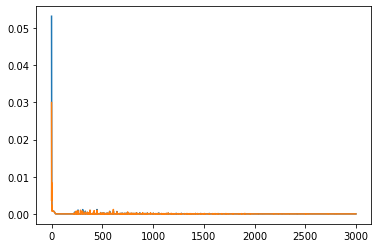

In [32]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

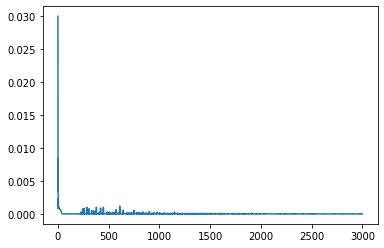

In [33]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [34]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[0.8239274 ]
 [0.7688646 ]
 [0.81488955]
 [0.76136494]
 [0.8071666 ]
 [0.75242734]
 [0.7980164 ]
 [0.8438704 ]
 [0.78995365]
 [0.8369467 ]
 [0.7820436 ]
 [0.8278599 ]
 [0.77362514]
 [0.8188796 ]
 [0.76505065]
 [0.8112472 ]
 [0.7569825 ]
 [0.8027464 ]
 [0.74957335]
 [0.7948483 ]
 [0.8402138 ]
 [0.78622633]
 [0.8317759 ]
 [0.7782421 ]
 [0.8243307 ]
 [0.7700326 ]
 [0.8154248 ]
 [0.7611249 ]
 [0.80760527]
 [0.7527969 ]
 [0.79900444]
 [0.8435515 ]
 [0.79104877]
 [0.837224  ]
 [0.7828004 ]
 [0.82807916]
 [0.7745002 ]
 [0.82067376]
 [0.7657606 ]
 [0.8117029 ]
 [0.75840455]
 [0.8037752 ]
 [0.75006294]
 [0.795452  ]
 [0.83973455]
 [0.7874274 ]
 [0.8337516 ]
 [0.7789842 ]
 [0.8249612 ]
 [0.7718097 ]
 [0.81671613]
 [0.7617959 ]
 [0.808161  ]
 [0.75386876]
 [0.800123  ]
 [0.84617513]
 [0.7918699 ]
 [0.8374145 ]
 [0.7844797 ]
 [0.83012   ]
 [0.7750228 ]
 [0.82118237]
 [0.7669312 ]
 [0.81239074]
 [0.75799775]
 [0.8038875 ]
 [0.75091314]
 [0.7961638 ]
 [0.8430463 ]
 [0.7878004 ]
 [0.8344594 ]
 [0.77

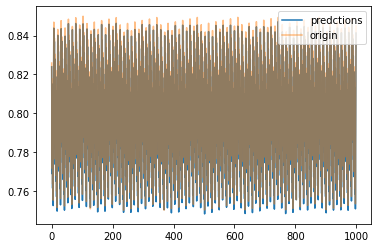

In [35]:
plt.figure()
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


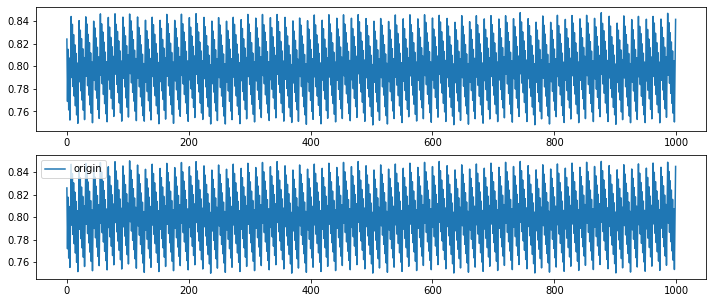

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()